### Data Loading

# Data Loading

### Import Library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

### Load dataset menggunakan API dari kaggle

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload() 

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d upadorprofzs/credit-risk

credit-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


Dataset yang telah di download berformat zip, ekstrak zip menggunakan library zipfile dan os

In [ ]:
import zipfile,os
local_zip = '/content/credit-risk.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df = pd.read_csv("/content/original.csv")
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


# Eksloratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


Dataset memiliki 5 kolom, dan kolom clientid tidak diperlukan maka akan dihapus

In [ ]:
df['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

In [ ]:
df = df.drop('clientid', axis=1)

In [ ]:
df.describe()

,income,age,loan,default
count,2000.000000,1997.000000,2000.000000,2000.000000
mean,45331.600018,40.807559,4444.369695,0.141500
std,14326.327119,13.624469,3045.410024,0.348624
min,20014.489470,-52.423280,1.377630,0.000000
25%,32796.459717,28.990415,1939.708847,0.000000
50%,45789.117313,41.317159,3974.719419,0.000000
75%,57791.281668,52.587040,6432.410625,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


Cek data null

In [ ]:
df.isna().sum()

income     0
age        3
loan       0
default    0
dtype: int64

Terdapat data null 3 pada kolom age

In [ ]:
df[df['age'].isnull()]

,income,age,loan,default
28,59417.805406,NaN,2082.625938,0
30,48528.852796,NaN,6155.784670,0
31,23526.302555,NaN,2862.010139,0


In [ ]:
df=df.dropna(subset=['age'])
df

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


## Univariate Analysis

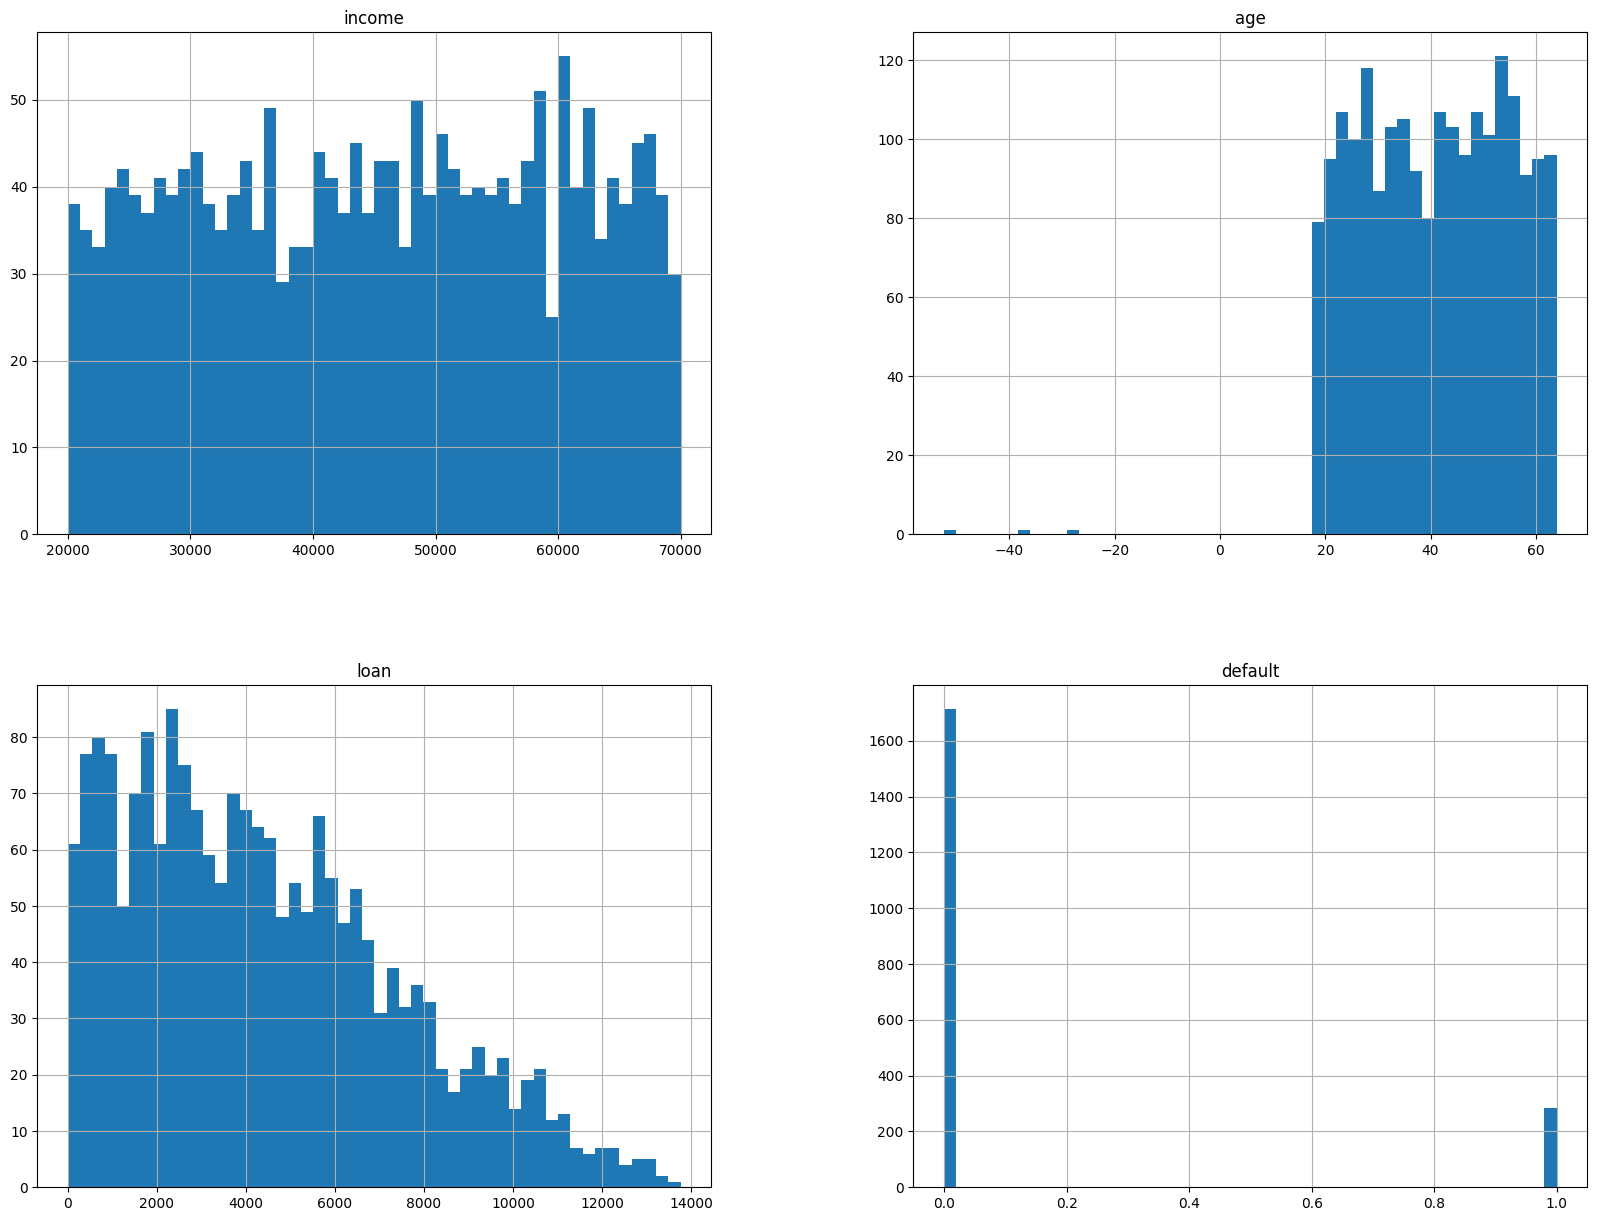

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Terdapat nilai negatif pada column age, jadi kita akan menghapus value tersebut

In [ ]:
df.loc[(df['age']<=0)]

,income,age,loan,default
15,50501.726689,-28.218361,3977.287432,0
21,32197.620701,-52.423280,4244.057136,0
26,63287.038908,-36.496976,9595.286289,0


In [ ]:
df = df.loc[(df[['age']]>=0).all(axis=1)]
df.describe()

,income,age,loan,default
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,45328.856915,40.927700,4443.240892,0.141926
std,14326.777212,13.271802,3046.879619,0.349062
min,20014.489470,18.055189,1.377630,0.000000
25%,32812.340050,29.043284,1934.218490,0.000000
50%,45785.950926,41.382673,3971.653442,0.000000
75%,57782.054534,52.616900,6438.044498,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


## Multivariate Analysis

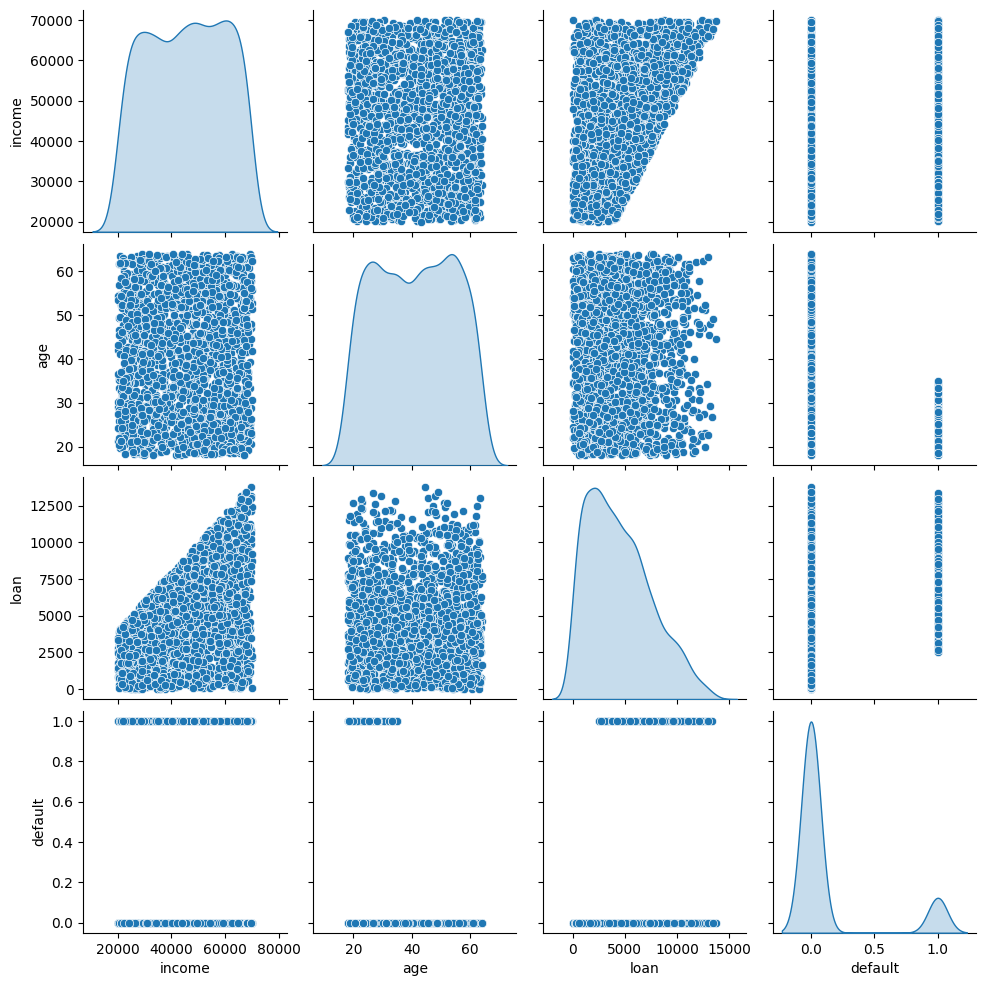

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Melihat korelasi antara fitur menggunakan correlation matrix

Text(0.5, 1.0, 'Correlation Matrix ')

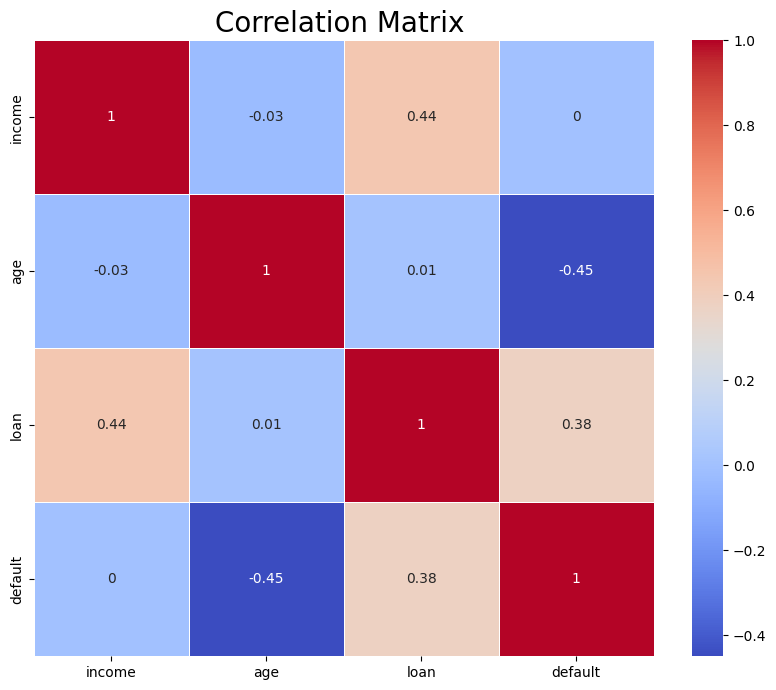

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)

# Data Preparation

Split dataset menjadi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["default"],axis =1)
y = df["default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

Cek jumlah sampel pada masing-masing bagian

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1994
Total # of sample in train dataset: 1196
Total # of sample in test dataset: 798


## Standarisasi

Variabel numerik ("income", "age", dan "loan") dalam dataset di-standarisasi menggunakan StandardScaler dari library sklearn.preprocessing. Hal ini dilakukan untuk mengubah skala variabel numerik agar memiliki mean 0 dan standar deviasi 1, sehingga mempermudah proses pemodelan.

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['income', 'age', 'loan']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,income,age,loan
1185,-0.278020,-0.662121,-0.373060
1037,-0.588723,0.853236,-0.867297
1103,-0.689926,-0.467060,-0.494347
1779,-0.771663,1.730786,0.511747
1251,-0.021271,-1.039514,-1.249332


# Modeling

Untuk model yang digunakan menggunakan 2 algoritma, yaitu KNN dan RandomForest

In [ ]:
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['KNN', 'RandomForest'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred)

models.loc['train_acc', 'KNN'] = accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred)

models.loc['train_acc', 'RandomForest'] = accuracy

# Evaluasi Model

Metric Evaluasi yang digunakan adalah akurasi. Metrik ini memberikan gambaran tentang seberapa baik model dapat memprediksi dengan benar. Namun, akurasi bisa menjadi bias jika jumlah kelas dalam data tidak seimbang.

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
acc = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))*100
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))*100
 
# Panggil mse
acc

,train,test
KNN,97.993311,98.120301
RF,100.0,98.370927


Hasil akurasi Random Forest sedikit lebih dinggi dibandingkan dengan model KNN, menunjukkan kemampuannya dalam mengklasifikasikan data dengan lebih baik.

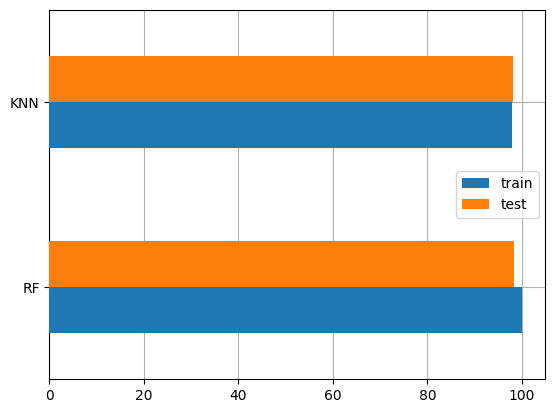

In [ ]:
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF
1905,0,0,0
994,1,1,1
1270,0,0,0
1035,0,0,0
1605,0,0,0
